In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.time_series import illustration, demo

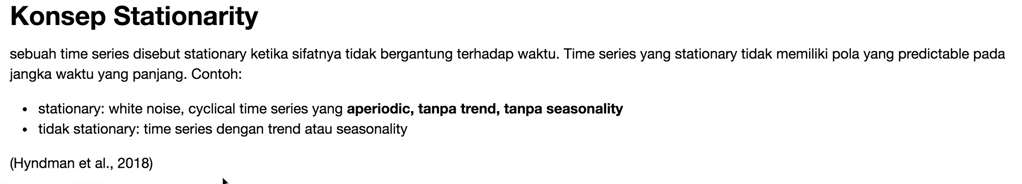

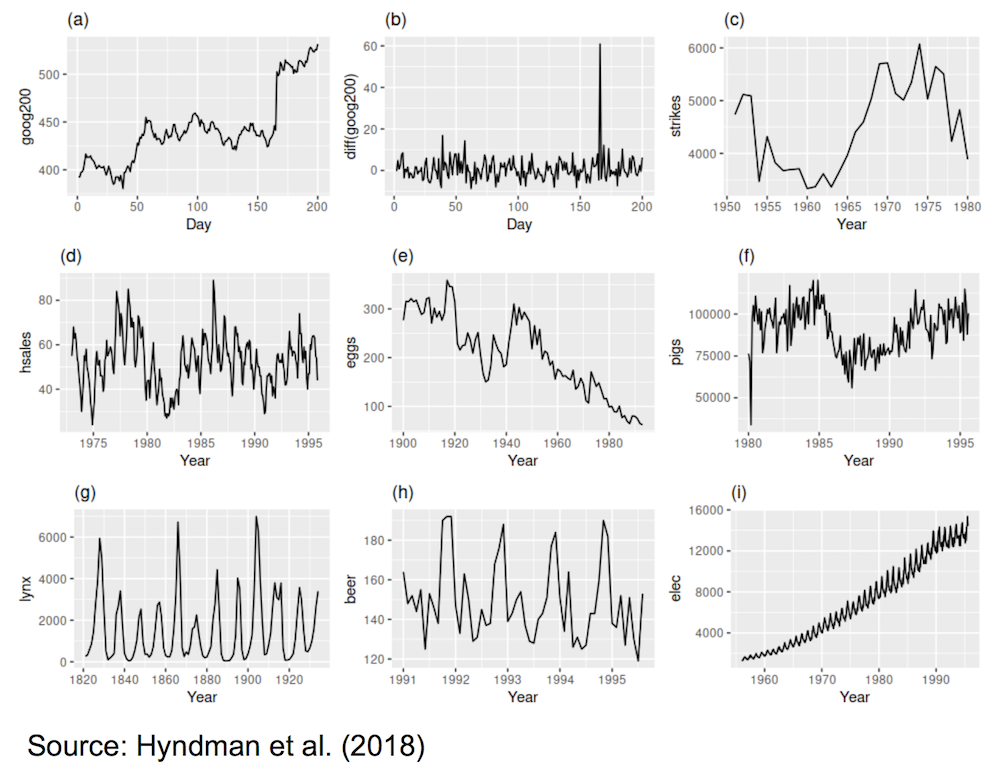

In [2]:
illustration.stationarity_quiz

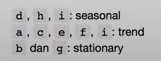

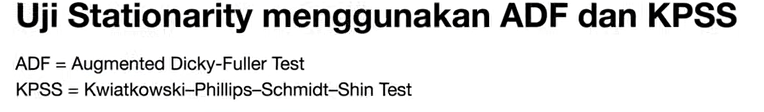

In [3]:
from jcopml.time_series import stationarity_tester

## Example 1: Data Stationary 

In [4]:
demo.stnry_data

0      0.496714
1      0.110093
2      0.702735
3      1.874397
4      0.703045
         ...   
145    0.831126
146   -0.821388
147   -1.731150
148   -0.343634
149    0.125168
Length: 150, dtype: float64

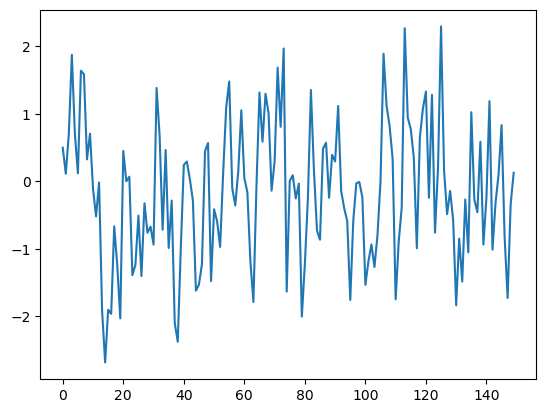

In [5]:
plt.plot(demo.stnry_data)

In [6]:
stationarity_tester(demo.stnry_data)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.863231,5.216419e-12,-3.475018,-2.881141,-2.577221,True
KPSS,0.131065,1.000000e-01,0.739000,0.463000,0.347000,False


## Example 2: trending data 

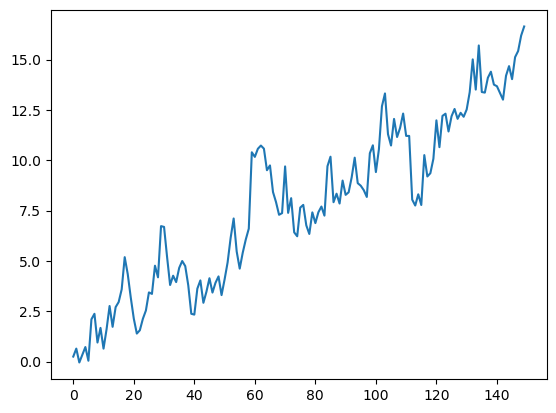

In [7]:
plt.plot(demo.trending_data)

In [8]:
stationarity_tester(demo.trending_data)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.077376,0.724009,-3.475325,-2.881275,-2.577293,False
KPSS,1.661763,0.010000,0.739000,0.463000,0.347000,True


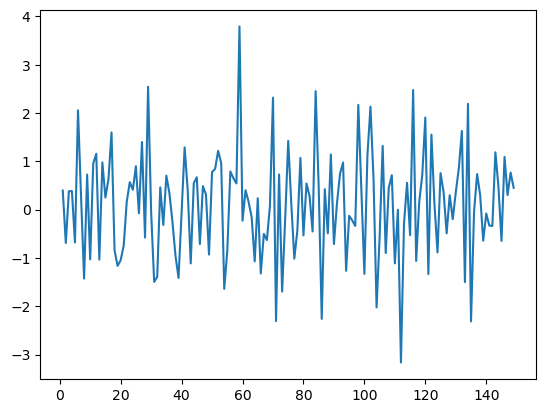

In [9]:
plt.plot(demo.trending_data.diff())

In [10]:
stationarity_tester(demo.trending_data.diff())

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.416320,8.048078e-27,-3.475325,-2.881275,-2.577293,True
KPSS,0.035351,1.000000e-01,0.739000,0.463000,0.347000,False


## Examle 3: seasonal data 

<AxesSubplot:xlabel='date'>

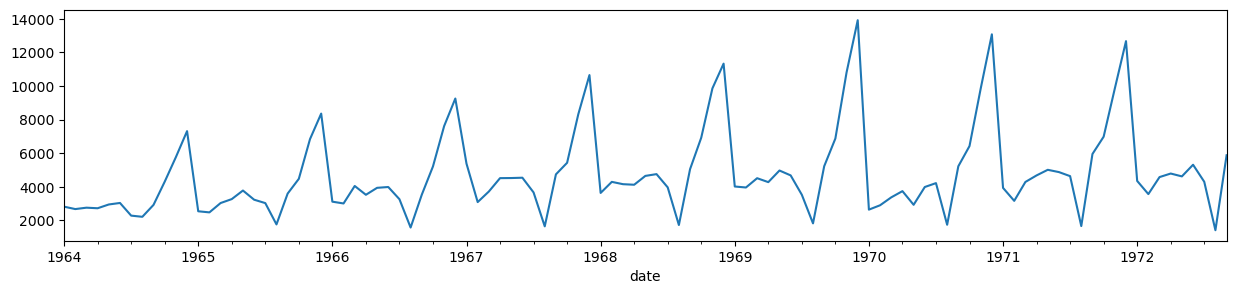

In [11]:
df = pd.read_csv("data/perrin_freres_champagne.csv", index_col='date', parse_dates=['date'])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [14]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.833593,0.363916,-3.502705,-2.893158,-2.583637,False
KPSS,0.512672,0.038813,0.739000,0.463000,0.347000,True


<AxesSubplot:xlabel='date'>

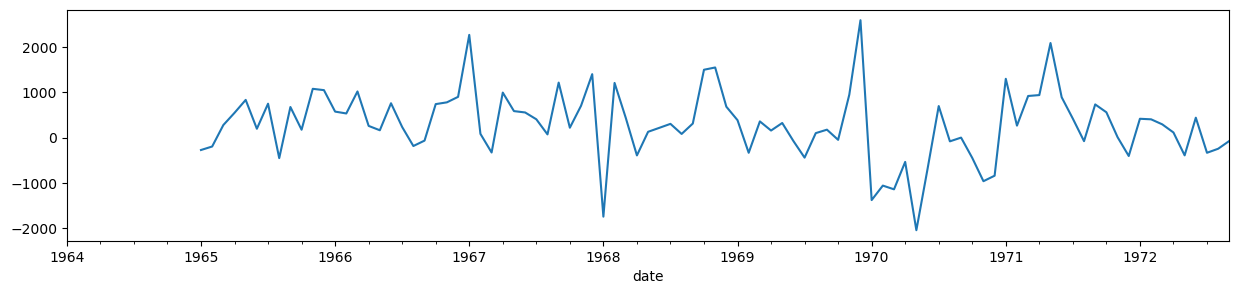

In [15]:
series.diff(12).plot(figsize=(15,3))

In [16]:
stationarity_tester(series.diff(12))

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.626619,2.060580e-11,-3.503515,-2.893508,-2.583824,True
KPSS,0.294397,1.000000e-01,0.739000,0.463000,0.347000,False


## Example 4: trend and seasonal data

<AxesSubplot:xlabel='Date'>

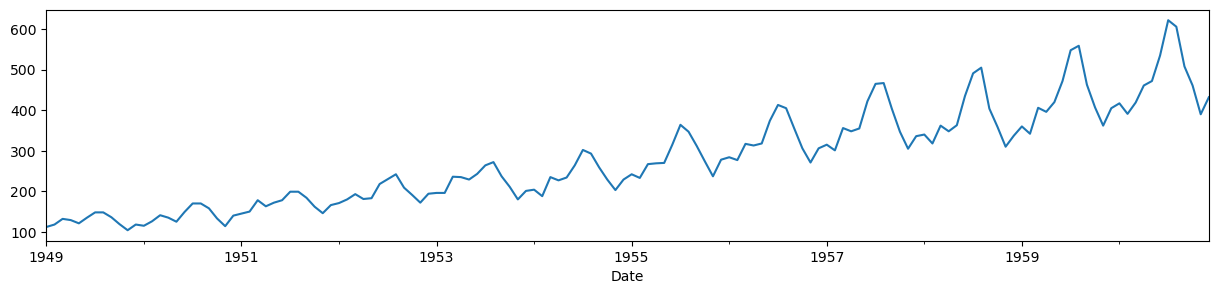

In [17]:
df = pd.read_csv("data/airline.csv", index_col='Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [18]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,0.815369,0.99188,-3.481682,-2.884042,-2.57877,False
KPSS,1.651312,0.01000,0.739000,0.463000,0.34700,True


In [19]:
from jcopml.time_series.decomposition import stl_decomposition

In [20]:
components = stl_decomposition(series)

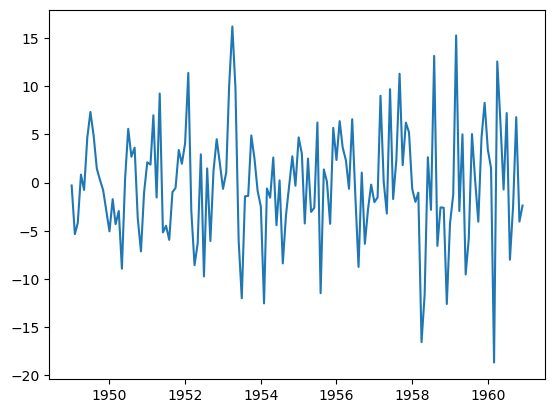

In [22]:
plt.plot(components.resid)

In [23]:
stationarity_tester(components.resid)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.098011,0.000014,-3.480119,-2.883362,-2.578407,True
KPSS,0.021308,0.100000,0.739000,0.463000,0.347000,False


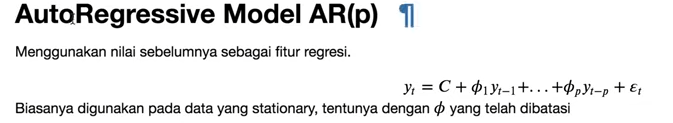

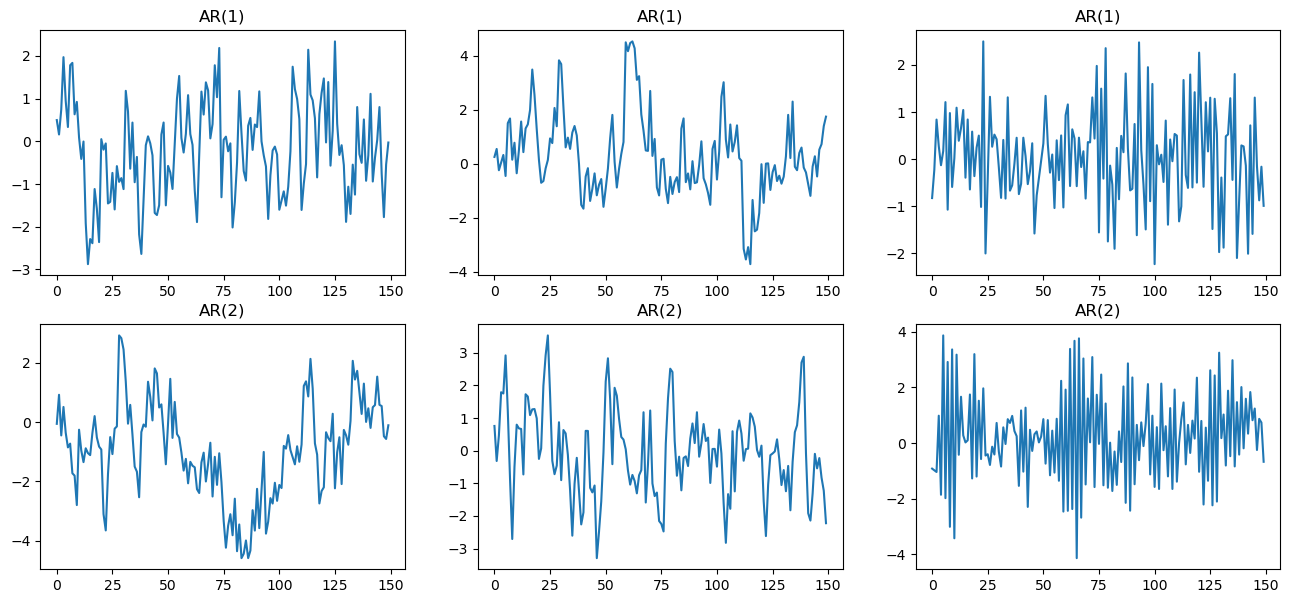

In [25]:
demo.AR_example()

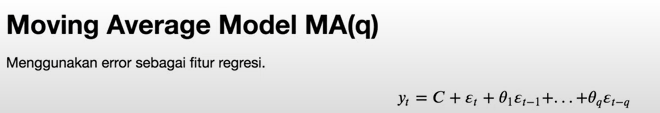

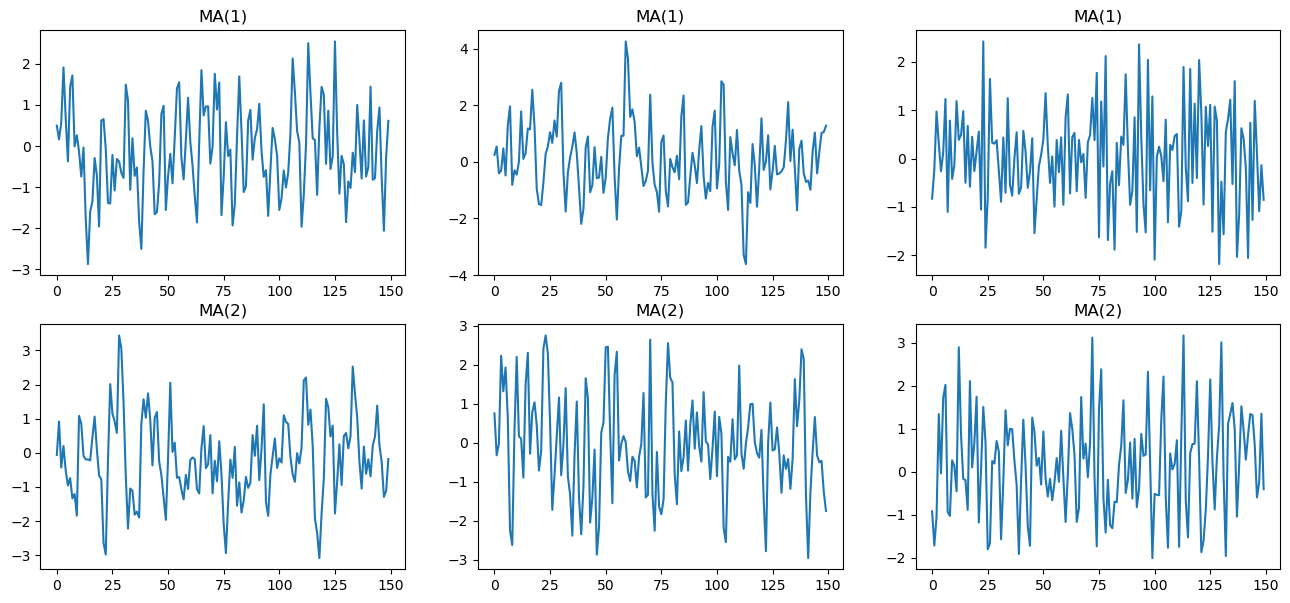

In [26]:
demo.MA_example()

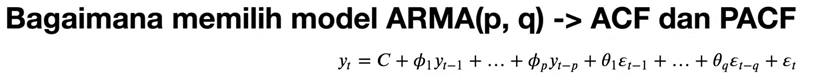

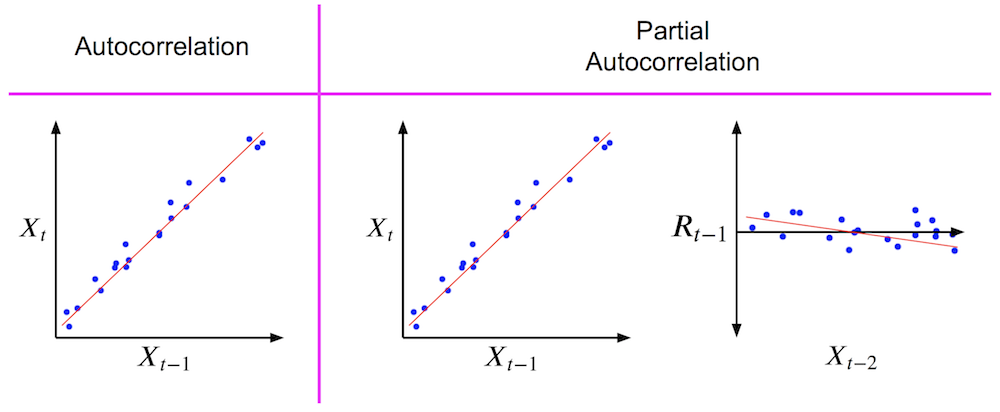

In [27]:
illustration.autocorrelation

## Menentukan orde AR(p) 

ACF: Damped geometric <br>
PACF: Signifikan hingga lag p

In [28]:
demo.AR1_simulation()

interactive(children=(FloatSlider(value=0.6, description='alpha1', max=2.0, min=-2.0), Output()), _dom_classes…

In [29]:
demo.AR2_simulation()

interactive(children=(FloatSlider(value=0.5, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=0.3, …

## Menentukan orde dari MA(q)

ACF: Signifikan hingga lag p <br>
PACF: Damped geometric

In [30]:
demo.MA1_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), Output()), _dom_classes…

In [31]:
demo.MA2_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), FloatSlider(value=0.6, …

# ARMA(p,q)

In [32]:
demo.AR2MA2_simulation()

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=-0.4,…

## Nonstationary series? ARIMA(p,d,q) 

E:\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


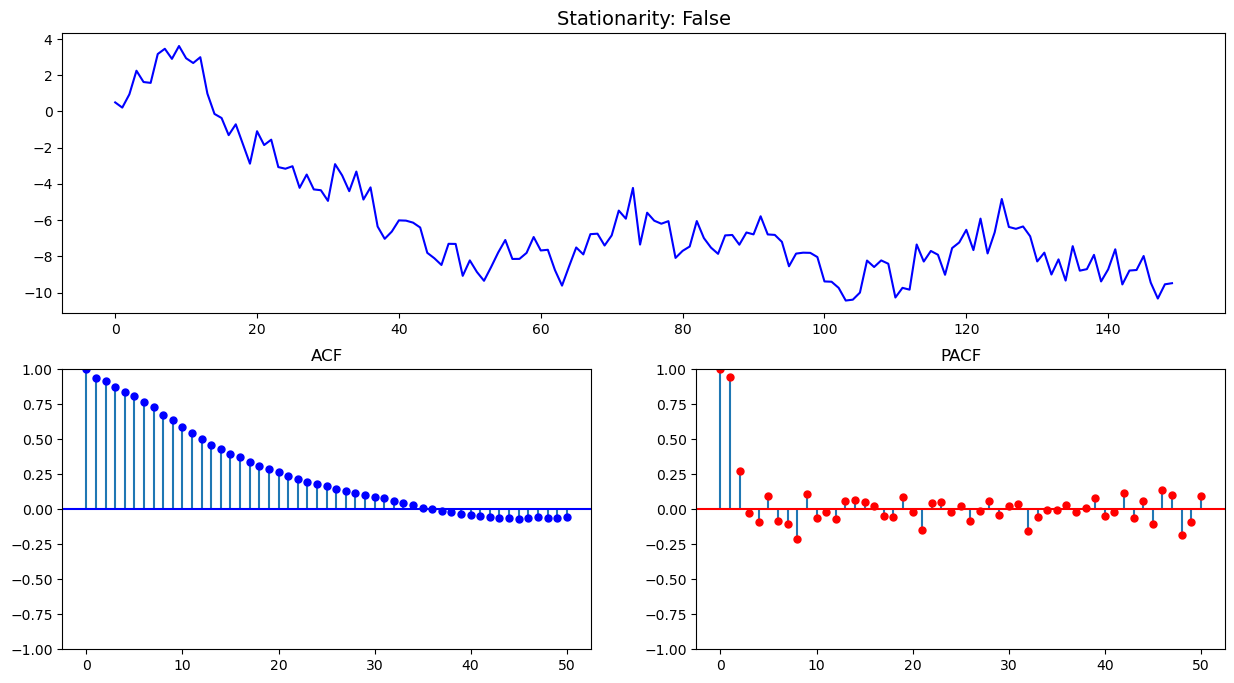

In [33]:
demo.nonstationarity_simulation()

E:\anaconda3\envs\jcop_ts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


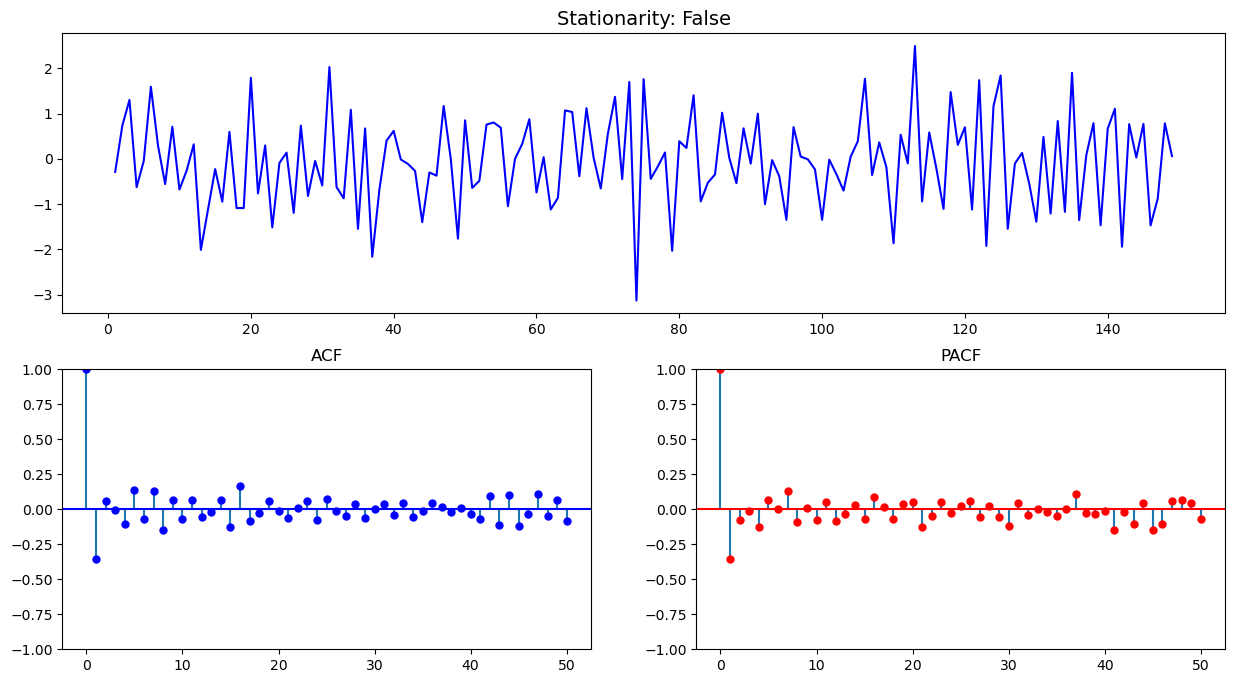

In [34]:
demo.nonstationarity_simulation(diff=True)

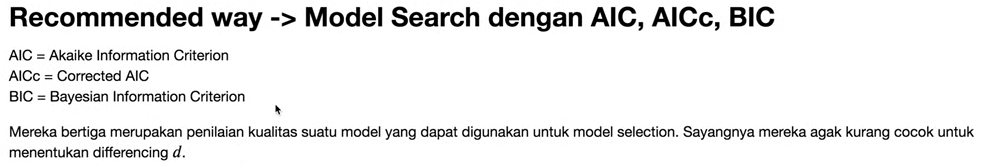

# Auto ARIMA -> Pyramid ARIMA

In [35]:
from pmdarima import auto_arima

<AxesSubplot:xlabel='Date'>

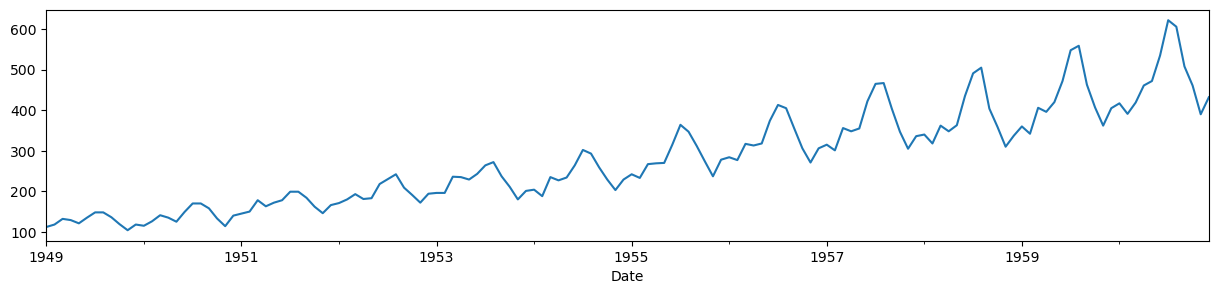

In [36]:
df = pd.read_csv("data/airline.csv", index_col='Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [37]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion='aicc', trace=True, suppress_warnings=True, random_state=42)

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AICC=807.172, Time=2.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AICC=900.025, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AICC=803.805, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AICC=852.869, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AICC=1051.707, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AICC=802.465, Time=0.13 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AICC=803.877, Time=0.31 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AICC=805.913, Time=0.57 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AICC=802.029, Time=0.16 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AICC=803.787, Time=0.36 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AICC=803.864, Time=0.28 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AICC=inf, Time=0.97 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AICC=802.349, Time=0.25 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AICC=802.578, Time=0.22 sec
 ARIMA(1,0,1)(0,1,0)[

In [38]:
arima

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [39]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Wed, 02 Nov 2022   AIC                            801.679
Time:                                    03:24:53   BIC                            812.370
Sample:                                         0   HQIC                           806.013
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.92   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

dates = pd.date_range(X_train.index[-1], periods=n_forecast, freq="M")
pred = pd.Series(pred, index=dates)

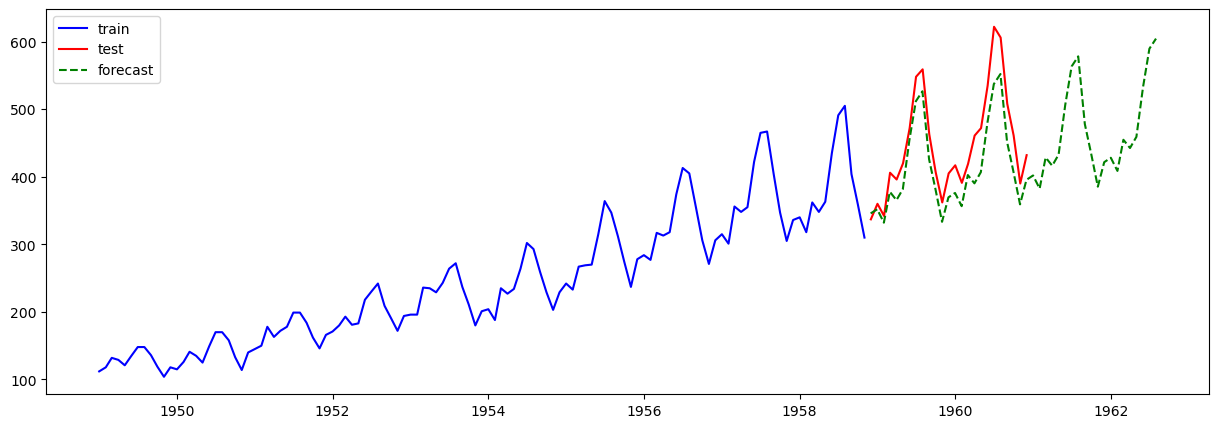

In [42]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label='forecast')
plt.legend()

In [44]:
df

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [45]:
X_train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 119 entries, 1949-01-01 to 1958-11-01
Series name: passengers
Non-Null Count  Dtype
--------------  -----
119 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB
